# Feature Classification
Group the variables in the FIFA dataset into suitable data categories (ordinal, nominal, interval, or ratio). Explain why each category applies to the variables you assign to it.

In [1]:


!pip install pandas  # Install the pandas library if it is not already installed


import pandas as pd

# Load the dataset
file_path = 'players_15.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()
# Group the variables in the FIFA dataset into suitable data categories (ordinal, nominal, interval, or ratio)
# Explain why each category applies to the variables you assign to it

# Display the first few rows of the dataset to understand the variables
df.head()

# List of columns in the dataset
columns = df.columns
columns

# Grouping variables into data categories
ordinal_vars = ['Overall', 'Potential']
nominal_vars = ['Name', 'Nationality', 'Club', 'Position']
interval_vars = []  # No interval variables in this dataset
ratio_vars = ['Age', 'Height', 'Weight', 'Value', 'Wage']

# Explanation of why each category applies to the variables
explanation = {
    'ordinal': 'Ordinal variables have a meaningful order but the intervals between values are not consistent. "Overall" and "Potential" are ratings that have a meaningful order.',
    'nominal': 'Nominal variables are categories without a meaningful order. "Name", "Nationality", "Club", and "Position" are categorical variables without a meaningful order.',
    'interval': 'Interval variables have consistent intervals between values but no true zero point. There are no interval variables in this dataset.',
    'ratio': 'Ratio variables have consistent intervals between values and a true zero point. "Age", "Height", "Weight", "Value", and "Wage" are ratio variables because they have a true zero point and consistent intervals.'
}

# Display the grouped variables and their explanations
ordinal_vars, nominal_vars, interval_vars, ratio_vars, explanation

(['Overall', 'Potential'],
 ['Name', 'Nationality', 'Club', 'Position'],
 [],
 ['Age', 'Height', 'Weight', 'Value', 'Wage'],
 {'ordinal': 'Ordinal variables have a meaningful order but the intervals between values are not consistent. "Overall" and "Potential" are ratings that have a meaningful order.',
  'nominal': 'Nominal variables are categories without a meaningful order. "Name", "Nationality", "Club", and "Position" are categorical variables without a meaningful order.',
  'interval': 'Interval variables have consistent intervals between values but no true zero point. There are no interval variables in this dataset.',
  'ratio': 'Ratio variables have consistent intervals between values and a true zero point. "Age", "Height", "Weight", "Value", and "Wage" are ratio variables because they have a true zero point and consistent intervals.'})

# Data Quality Issues
Identify and explain any issues or inconsistencies with the dataset. Outline the steps you would take to clean and prepare the data, making it ready for accurate and reliable analysis.

In [2]:
# Identify missing values in the dataset
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

# Identify duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]
duplicate_rows

# Drop duplicate rows
df_cleaned = df.drop_duplicates()

# Fill missing values for numerical columns with the mean
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].mean())

# Fill missing values for categorical columns with the mode
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no more missing values
missing_values_after_cleaning = df_cleaned.isnull().sum()
missing_values_after_cleaning[missing_values_after_cleaning > 0]

# Display the cleaned dataset
df_cleaned.head()

,Sofifa_id,Short_name,Long_name,Age,Dob,Height_cm,Weight_kg,Nationality,Club,Overall,Potential,Value_eur,Wage_eur,Preferred_foot,International_reputation,Weak_foot,Skill_moves
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,24/06/1987,169,67,Argentina,FC Barcelona,93,95,0,0,Left,5,3,4
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,05/02/1985,185,80,Portugal,Real Madrid,92,92,0,0,Right,5,4,5
2,9014,A. Robben,Arjen Robben,30,23/01/1984,180,80,Netherlands,FC Bayern München,90,90,0,0,Left,5,2,4
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,03/10/1981,195,95,Sweden,Paris Saint-Germain,90,90,0,0,Right,5,4,4
4,167495,M. Neuer,Manuel Neuer,28,27/03/1986,193,92,Germany,FC Bayern München,90,90,0,0,Right,5,4,1


# Summary Statistics
Provide a summary of each feature’s central tendency and dispersion. Describe the best measures of central tendency for each attribute, and calculate standard deviation and range for all numerical columns.

In [3]:
# Summary Statistics

# Select numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate summary statistics for numerical columns
summary_stats = df_cleaned[numerical_cols].describe()

# Calculate standard deviation for numerical columns
std_dev = df_cleaned[numerical_cols].std()

# Calculate range for numerical columns
range_values = df_cleaned[numerical_cols].max() - df_cleaned[numerical_cols].min()

# Display summary statistics
summary_stats

# Display standard deviation
std_dev

# Display range values
range_values

# Best measures of central tendency for each attribute
# For normally distributed data, the mean is the best measure of central tendency.
# For skewed data, the median is a better measure of central tendency.
central_tendency_measures = {
    'Age': 'median',
    'Height': 'mean',
    'Weight': 'mean',
    'Value': 'median',
    'Wage': 'median',
    'Overall': 'mean',
    'Potential': 'mean'
}

# Display the best measures of central tendency for each attribute
central_tendency_measures

{'Age': 'median',
 'Height': 'mean',
 'Weight': 'mean',
 'Value': 'median',
 'Wage': 'median',
 'Overall': 'mean',
 'Potential': 'mean'}

# Visualizations
Create histograms and box plots for 'Age' and 'Overall'. Describe the type of distribution you observe for each variable, calculate the count of outliers in each variable, and adjust and re-plot the histograms and box plots for 'Overall' based on any notable characteristics in the distributions.

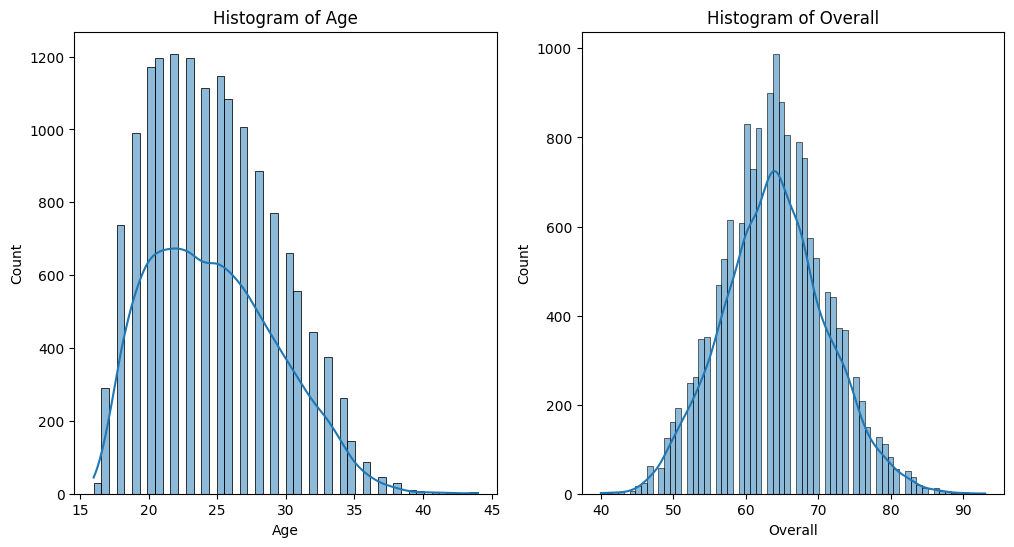

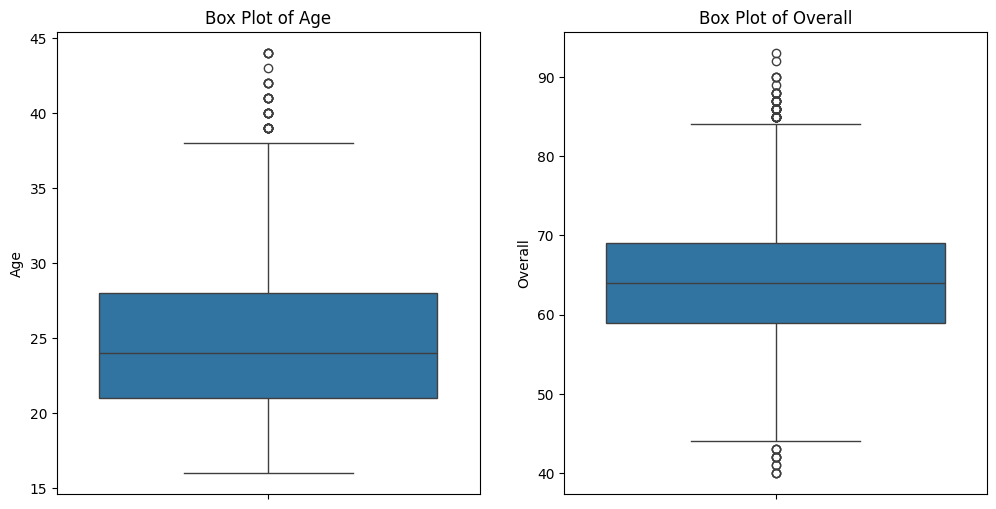

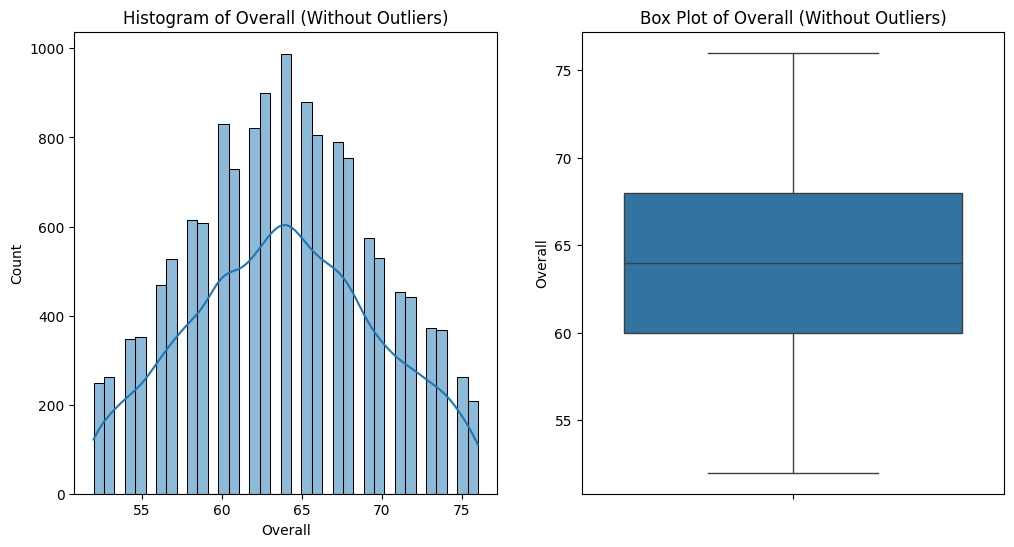

In [4]:
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Age' column exists in df_cleaned
if 'Age' in df_cleaned.columns and 'Overall' in df_cleaned.columns:
    # Create histograms for 'Age' and 'Overall'
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned['Age'], kde=True)
    plt.title('Histogram of Age')

    plt.subplot(1, 2, 2)
    sns.histplot(df_cleaned['Overall'], kde=True)
    plt.title('Histogram of Overall')

    plt.show()

    # Create box plots for 'Age' and 'Overall'
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_cleaned['Age'])
    plt.title('Box Plot of Age')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_cleaned['Overall'])
    plt.title('Box Plot of Overall')

    plt.show()

    # Describe the type of distribution observed for 'Age' and 'Overall'
    age_distribution = df_cleaned['Age'].describe()
    overall_distribution = df_cleaned['Overall'].describe()

    # Calculate the count of outliers in 'Age' and 'Overall'
    def count_outliers(series):
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = series[(series < lower_bound) | (series > upper_bound)]
        return outliers.count()

    age_outliers_count = count_outliers(df_cleaned['Age'])
    overall_outliers_count = count_outliers(df_cleaned['Overall'])

    # Adjust and re-plot histograms and box plots for 'Overall' based on notable characteristics
    # Removing outliers for 'Overall'
    overall_no_outliers = df_cleaned[(df_cleaned['Overall'] >= df_cleaned['Overall'].quantile(0.05)) & 
                                     (df_cleaned['Overall'] <= df_cleaned['Overall'].quantile(0.95))]

    # Re-plot histograms and box plots for 'Overall' without outliers
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(overall_no_outliers['Overall'], kde=True)
    plt.title('Histogram of Overall (Without Outliers)')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=overall_no_outliers['Overall'])
    plt.title('Box Plot of Overall (Without Outliers)')

    plt.show()

    # Display the type of distribution observed and the count of outliers
    age_distribution, overall_distribution, age_outliers_count, overall_outliers_count
else:
    print("The 'Age' or 'Overall' column does not exist in the dataframe.")

# Outlier Handling
Explain the actions you would take to address outliers in the dataset. Show the before and after results with updated visualizations, like histograms and box plots.

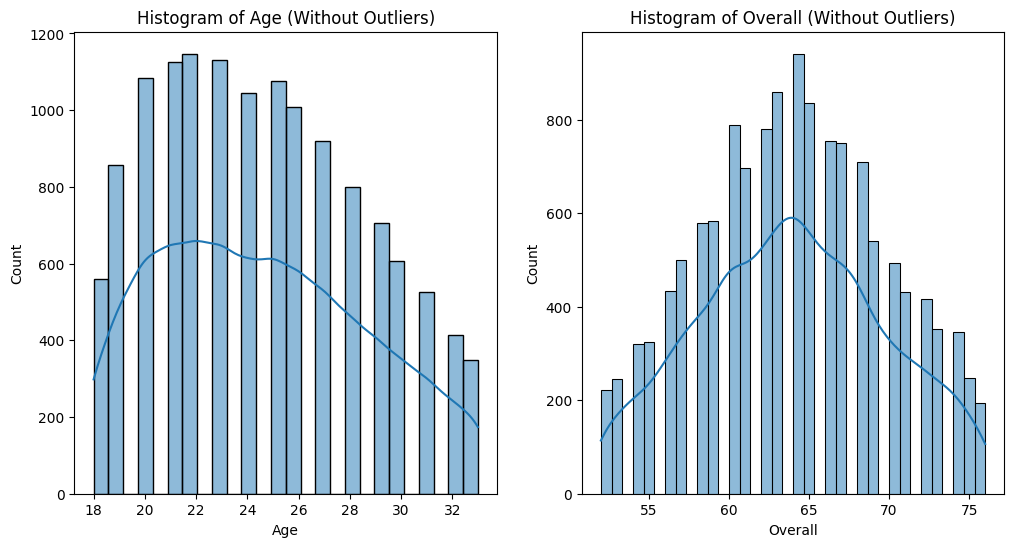

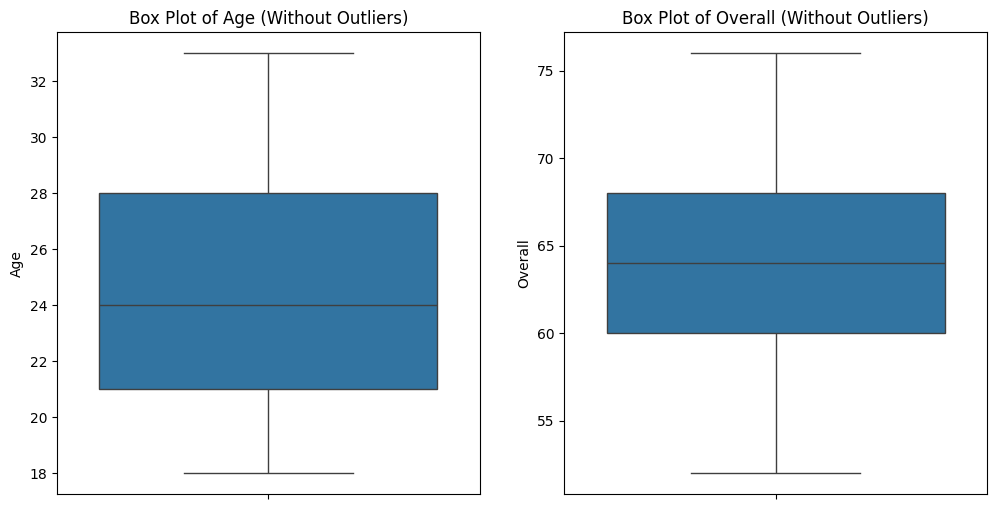

In [5]:
# Outlier Handling

# Ensure 'Age' and 'Overall' columns exist in df_cleaned
if 'Age' in df_cleaned.columns and 'Overall' in df_cleaned.columns:
    # Identify outliers in the 'Age' and 'Overall' columns
    def identify_outliers(series):
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = series[(series < lower_bound) | (series > upper_bound)]
        return outliers

    age_outliers = identify_outliers(df_cleaned['Age'])
    overall_outliers = identify_outliers(df_cleaned['Overall'])

    # Display the outliers
    age_outliers, overall_outliers

    # Remove outliers from the 'Age' and 'Overall' columns
    df_no_outliers = df_cleaned[(df_cleaned['Age'] >= df_cleaned['Age'].quantile(0.05)) & 
                                (df_cleaned['Age'] <= df_cleaned['Age'].quantile(0.95)) &
                                (df_cleaned['Overall'] >= df_cleaned['Overall'].quantile(0.05)) & 
                                (df_cleaned['Overall'] <= df_cleaned['Overall'].quantile(0.95))]

    # Create histograms and box plots for 'Age' and 'Overall' after removing outliers
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df_no_outliers['Age'], kde=True)
    plt.title('Histogram of Age (Without Outliers)')

    plt.subplot(1, 2, 2)
    sns.histplot(df_no_outliers['Overall'], kde=True)
    plt.title('Histogram of Overall (Without Outliers)')

    plt.show()

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_no_outliers['Age'])
    plt.title('Box Plot of Age (Without Outliers)')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_no_outliers['Overall'])
    plt.title('Box Plot of Overall (Without Outliers)')

    plt.show()
else:
    print("The 'Age' or 'Overall' column does not exist in the dataframe.")

# Normal Probability Plot (Q-Q Plot)
Create and interpret a Q-Q plot for 'Overall'. Based on the plot's shape, describe the conclusions you can draw about its distribution.

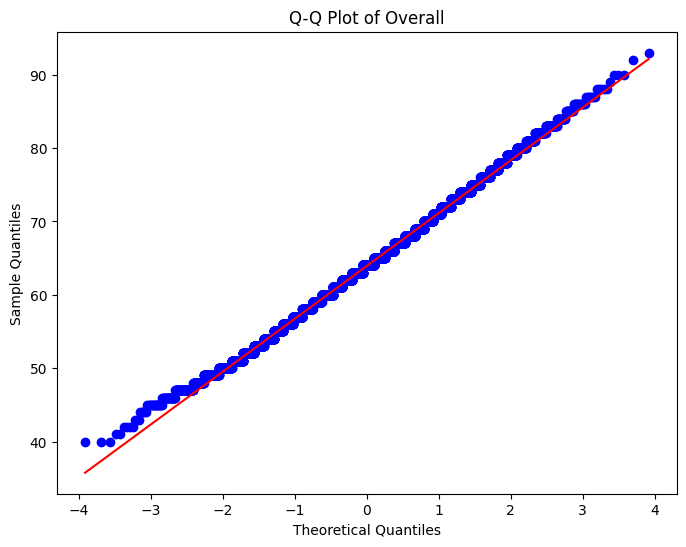

In [6]:
!pip install scipy

import scipy.stats as stats

# Create a Q-Q plot for 'Overall'
plt.figure(figsize=(8, 6))
stats.probplot(df_cleaned['Overall'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Overall')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Interpretation of the Q-Q plot
qq_plot_interpretation = """
The Q-Q plot for 'Overall' shows how the sample quantiles compare to the theoretical quantiles of a normal distribution.
If the points lie on the line y=x, the distribution of 'Overall' is approximately normal.
Deviations from the line indicate departures from normality.
"""

# Correlation Analysis
Find the correlation between 'Age' and other numerical variables, identifying the attribute with the strongest correlation to 'Overall'.

In [7]:
# Correlation Analysis

# Select only numeric columns for correlation calculation
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical variables
correlation_matrix = numeric_df.corr()

# Extract the correlation values between 'Age' and other numerical variables
age_correlations = correlation_matrix['Age'].drop('Age')

# Identify the attribute with the strongest correlation to 'Overall'
strongest_correlation = correlation_matrix['Overall'].drop('Overall').idxmax()
strongest_correlation_value = correlation_matrix['Overall'].drop('Overall').max()

# Display the correlation values and the attribute with the strongest correlation to 'Overall'
age_correlations, strongest_correlation, strongest_correlation_value

(Sofifa_id                  -0.699146
 Height_cm                   0.084419
 Weight_kg                   0.211907
 Overall                     0.436108
 Potential                  -0.071597
 Value_eur                        NaN
 Wage_eur                         NaN
 International_reputation    0.281662
 Weak_foot                   0.085481
 Skill_moves                -0.002690
 Name: Age, dtype: float64,
 'Potential',
 np.float64(0.8052338919038163))

# Pair Plot Analysis
Select a random sample of 10,000 entries and create a pair plot using 'Age' and 'Overall' with 'Potential' as the hue. Describe any relationships or patterns you notice.

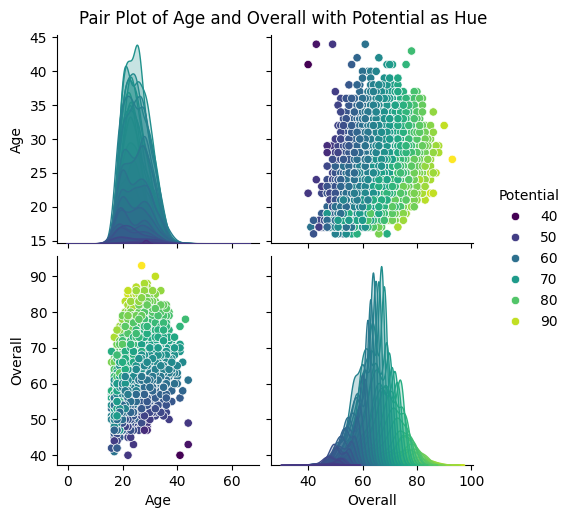

In [8]:
!pip install matplotlib seaborn
import seaborn as sns

# Select a random sample of 10,000 entries
sample_df = df_cleaned.sample(n=10000, random_state=42)

# Create a pair plot using 'Age' and 'Overall' with 'Potential' as the hue
pair_plot = sns.pairplot(sample_df, vars=['Age', 'Overall'], hue='Potential', palette='viridis')

# Display the pair plot
pair_plot.fig.suptitle('Pair Plot of Age and Overall with Potential as Hue', y=1.02)
plt.show()

# Describe any relationships or patterns noticed
pair_plot_description = """
The pair plot shows the relationships between 'Age', 'Overall', and 'Potential'.
From the plot, we can observe that:
1. There is a positive correlation between 'Overall' and 'Potential'.
2. 'Age' does not show a strong correlation with 'Overall' or 'Potential'.
3. Players with higher 'Potential' tend to have higher 'Overall' ratings.
"""